Analisis Exploratorio de Datos: EDA

In [8]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
sp500_data = yf.download('^GSPC', start='2000-01-01', end='2023-02-23')


[*********************100%***********************]  1 of 1 completed


In [22]:
#sp500_data_1 = pd.DataFrame(sp500_data)
sp500_data_1

NameError: name 'sp500_data_1' is not defined

In [15]:
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5822 entries, 2000-01-03 to 2023-02-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5822 non-null   float64
 1   High       5822 non-null   float64
 2   Low        5822 non-null   float64
 3   Close      5822 non-null   float64
 4   Adj Close  5822 non-null   float64
 5   Volume     5822 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 318.4 KB


In [16]:
sp500_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5.822000e+03
mean,1886.489156,1897.781251,1874.257266,1886.705950,1886.705950,3.302644e+09
std,976.763129,981.894853,971.187546,976.894131,976.894131,1.522890e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1184.599976,1191.762512,1177.137482,1184.415009,1184.415009,1.985738e+09
50%,1434.525024,1443.684998,1425.535034,1434.429993,1434.429993,3.408845e+09
75%,2390.735046,2395.654968,2380.305054,2389.332520,2389.332520,4.159688e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


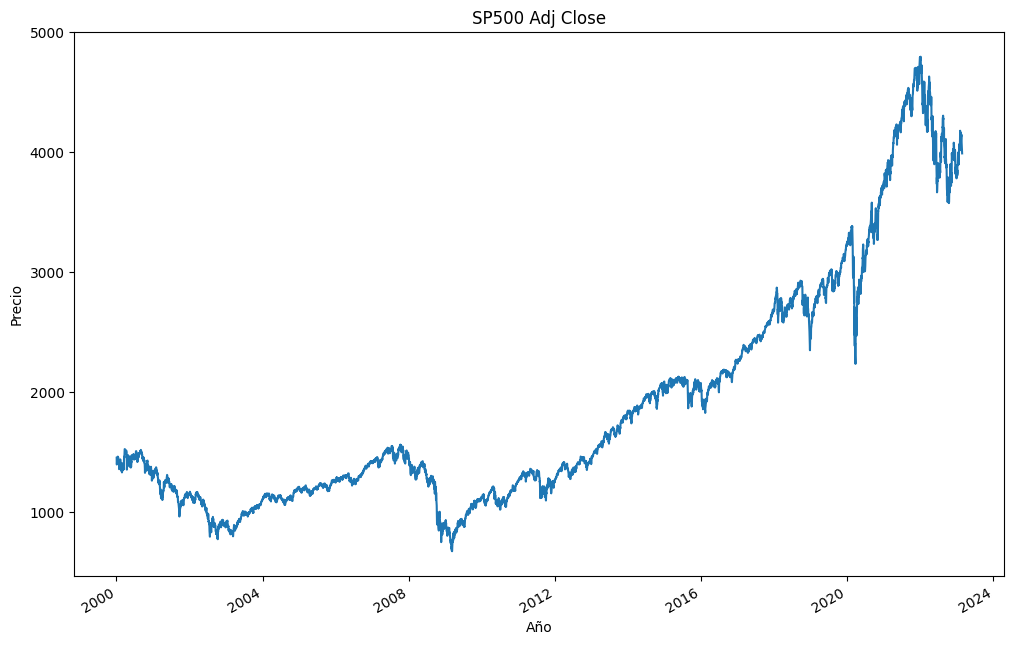

In [12]:
sp500_data['Adj Close'].plot(figsize=(12,8))
plt.title('SP500 Adj Close')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()

In [21]:
# Descargar lista de empresas del S&P 500
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers = sp500_tickers.Symbol.to_list()

# Descargar precios de cierre ajustados para cada empresa
sp500_data = yf.download(sp500_tickers, start="2000-01-01", end="2022-02-23")['Adj Close']

# Crear DataFrame con los precios de cierre ajustados para cada empresa
sp500_df = pd.DataFrame(sp500_data)

[*********************100%***********************]  503 of 503 completed

3 Failed downloads:
- BRK.B: No timezone found, symbol may be delisted
- GEHC: Data doesn't exist for startDate = 946702800, endDate = 1645592400
- BF.B: No data found for this date range, symbol may be delisted


In [23]:
sp500_df

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,44.001270,NaN,NaN,0.850643,NaN,2.988897,9.221026,1.277778,NaN,16.274670,...,NaN,7.294348,18.984545,6.772067,NaN,4.770266,NaN,25.027779,37.660614,NaN
2000-01-04,40.640064,NaN,NaN,0.778926,NaN,2.784836,8.957568,1.270833,NaN,14.909398,...,NaN,7.462309,18.620922,6.772067,NaN,4.674380,NaN,24.666668,35.836941,NaN
2000-01-05,38.119160,NaN,NaN,0.790324,NaN,3.000901,8.941100,1.388889,NaN,15.204175,...,NaN,7.750246,19.636053,6.889139,NaN,4.698355,NaN,25.138889,35.794540,NaN
2000-01-06,36.667717,NaN,NaN,0.721931,NaN,3.228970,9.253958,1.375000,NaN,15.328288,...,NaN,7.678262,20.651194,6.898146,NaN,4.658402,NaN,23.777779,36.303463,NaN
2000-01-07,39.723366,NaN,NaN,0.756128,NaN,3.649096,9.352757,1.451389,NaN,16.072985,...,NaN,7.678262,20.590588,6.880133,NaN,4.554527,NaN,23.513889,36.388290,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-15,135.021637,18.840000,214.864197,171.749588,139.451736,139.751160,121.812469,47.680000,324.491760,479.500000,...,96.260002,64.327583,75.266609,55.707512,89.584587,120.127403,117.601799,434.940002,71.756218,196.173950
2022-02-16,134.266586,18.820000,214.661469,171.511047,140.521042,140.985870,121.517708,47.650002,328.737396,477.700012,...,94.230003,64.152458,75.614037,55.825809,89.525352,120.469231,117.948425,430.970001,71.736809,193.525345
2022-02-17,129.398621,18.219999,212.750305,167.863144,139.654037,140.373459,118.471909,46.970001,318.088806,457.709991,...,93.870003,64.308121,75.498245,54.761143,88.676201,121.156067,115.512428,423.500000,69.125900,191.521561


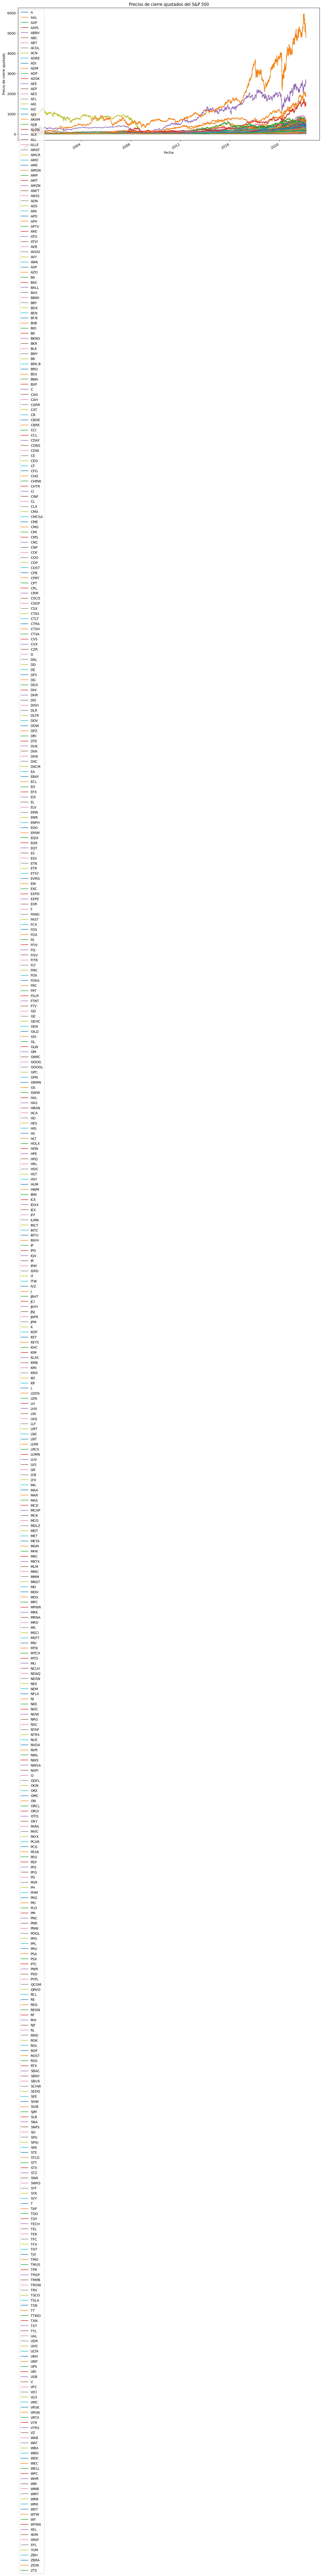

In [24]:
# Gráfico de los precios de cierre ajustados del S&P 500
sp500_df.plot(figsize=(16,8))
plt.title('Precios de cierre ajustados del S&P 500')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado')
plt.show()